In [17]:
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, './src')
import post_production as pp

import seaborn as sns

In [18]:
from chainconsumer import ChainConsumer

In [19]:
def plot_corner_marco(chain, sample, pop=None, save=None, annotate=None, xy=(200,200), limits=None):
    
    assert sample in ["N", "S", "joint"]
    
    if pop is not None:
        chain = np.delete(chain, pop, -1)
        
    if sample == "joint":
        f_nl = chain[:,0,:].flatten()
        b1N = chain[:,1,:].flatten()
        s_fogN = chain[:,2,:].flatten()
        NN = chain[:,3,:].flatten()
        b1S = chain[:,4,:].flatten()
        s_fogS = chain[:,5,:].flatten()
        NS = chain[:,6,:].flatten()
        
        data = np.vstack([f_nl, b1N, b1S]).transpose()
        labels=[r"$f_{\rm NL}$",
                r"$b_1\, (\rm NGC)$",
                r"$b_1\, (\rm SGC)$"]
        
    else:
        f_nl = chain[:,0,:].flatten()
        b1 = chain[:,1,:].flatten()
        sigma_fog = chain[:,2,:].flatten()
        N = chain[:,3,:].flatten()
        
        data = np.vstack([f_nl, b1, sigma_fog, N]).transpose()
        labels=[r"$f_{\rm NL}$",
                r"$b_1$",
                r"$\sigma_{\rm FoG}$",
                r"$N$"]
        
    if limits is not None:
        assert len(limits) == len(labels)
        extents = {}
        for i,l in enumerate(labels):
            if limits[i] is None: continue
            extents[l] = limits[i]
    else: extents = None
        
    c = ChainConsumer()
    c.add_chain(data, parameters=labels)
    #modify kde for a different smoothing (the higher, the smoother)
    #summary area used to write summaries in the plot
    c.configure(kde=[2.1], usetex=True, diagonal_tick_labels=True, shade=[True], bar_shade=[False], summary = False,
               tick_font_size=20, label_font_size=25)
    fig = c.plotter.plot(figsize="column", extents=extents)
    
    #c = ChainConsumer()
    #c.add_chain(data1, parameters=labels, name="FKP")
    ##c.add_chain(data2, parameters=labels, name="Optimal")
    #c.configure(kde=[2.1, 2.1], usetex=True, diagonal_tick_labels=True, shade=[True], bar_shade=[False], summary = False)
    #fig = c.plotter.plot(figsize="column")

    #fig.set_size_inches(3 + fig.get_size_inches())

    if annotate is not None:
        plt.annotate(annotate, xy=xy, xycoords='axes pixels', fontsize=25)
    
    fig.set_size_inches(3 + fig.get_size_inches()) 
    
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

In [20]:
output = "fits/output-fnl/"

In [21]:
output_NN_weights = "fits/output_NN_weights-fnl/"

# Corner Plots

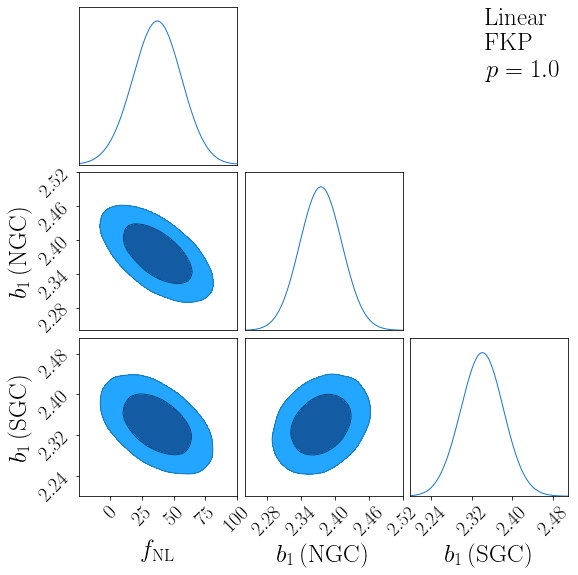

In [22]:
chain = np.load(output + "joint/fkp/1.0/chain.npy")
plot_corner_marco(chain, "joint", save = "./figures/corner_joint_fkp_10_linear.pdf",
                  annotate="${\\rm Linear}$ \n ${\\rm FKP}$ \n $p=1.0$", xy=(75, 420),
                  limits=[(-25,100), (2.24,2.52), (2.20,2.51)])

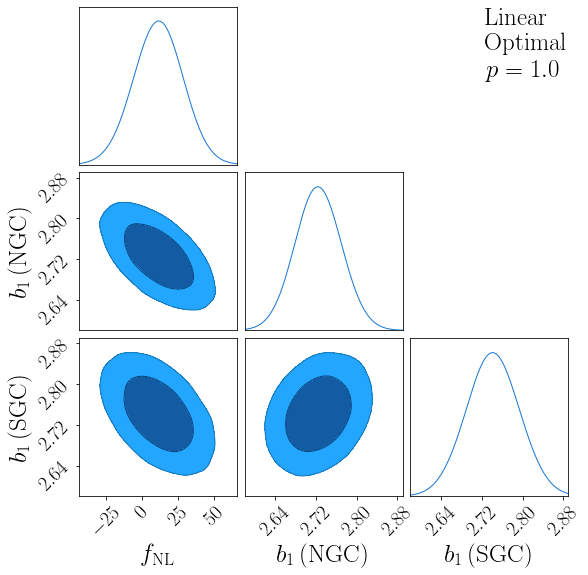

In [23]:
chain = np.load(output + "joint/1.0/chain.npy")
plot_corner_marco(chain, "joint", save = "./figures/corner_joint_10_linear.pdf",
                 annotate="${\\rm Linear}$ \n ${\\rm Optimal}$ \n $p=1.0$", xy=(75, 420),
                  limits=[None, (2.58,2.89), (2.58,2.89)])

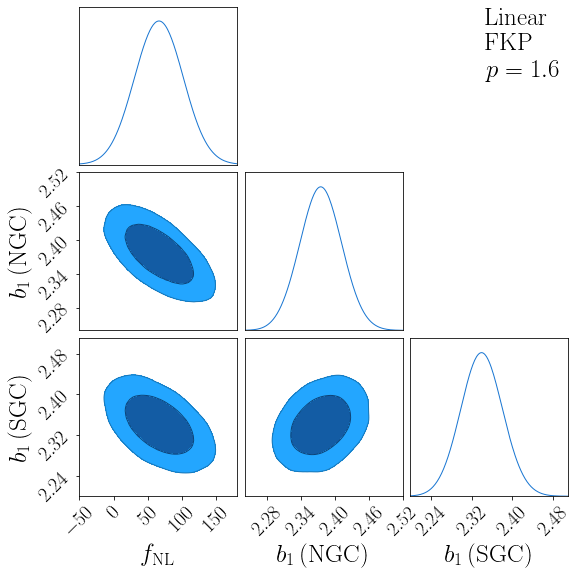

In [24]:
chain = np.load(output + "joint/fkp/1.6/chain.npy")
plot_corner_marco(chain, "joint", save = "./figures/corner_joint_fkp_16_linear.pdf",
                 annotate="${\\rm Linear}$ \n ${\\rm FKP}$ \n $p=1.6$", xy=(75, 420),
                limits=[None, (2.24, 2.52), (2.20, 2.51)])

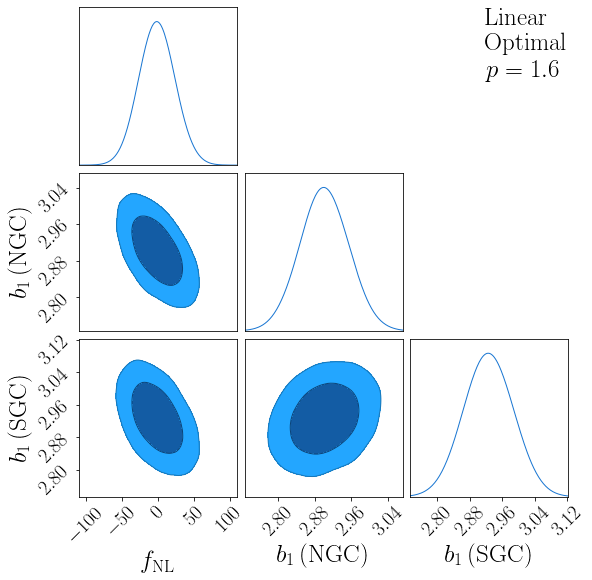

In [25]:
chain = np.load(output + "joint/1.6/chain.npy")
plot_corner_marco(chain, "joint", save = "./figures/corner_joint_16_linear.pdf",
                 annotate="${\\rm Linear}$ \n ${\\rm Optimal}$ \n $p=1.6$", xy=(75, 420),
                  limits=[(-110,110), None, None])

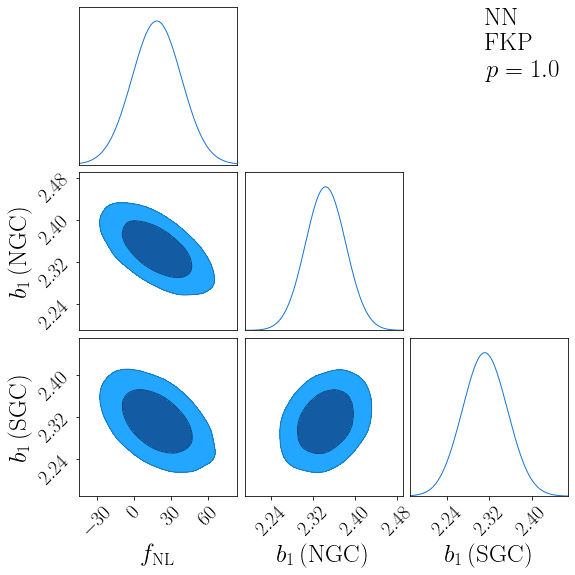

In [26]:
chain = np.load(output_NN_weights + "joint/fkp/1.0/chain.npy")
plot_corner_marco(chain, "joint", save = "./figures/corner_joint_fkp_10_NN.pdf",
                 annotate="${\\rm NN}$ \n ${\\rm FKP}$ \n $p=1.0$", xy=(75, 420),
                 limits=[None, (2.19, 2.49), (2.17, 2.47)])

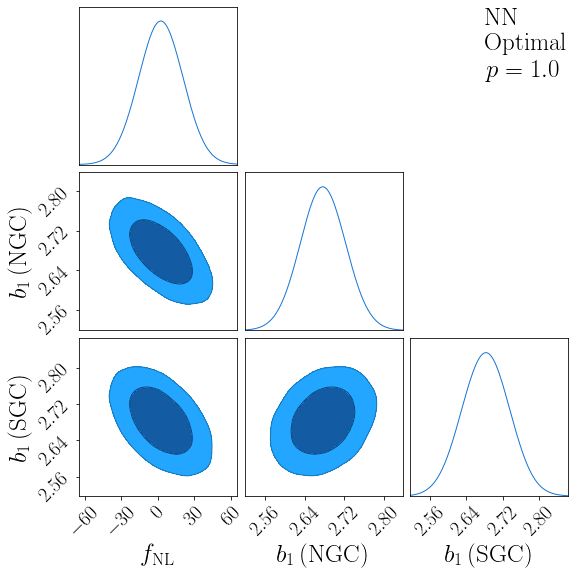

In [27]:
chain = np.load(output_NN_weights + "joint/1.0/chain.npy")
plot_corner_marco(chain, "joint", save = "./figures/corner_joint_10_NN.pdf",
                 annotate="${\\rm NN}$ \n ${\\rm Optimal}$ \n $p=1.0$", xy=(75, 420),
                 limits=[(-65,65), None, None])

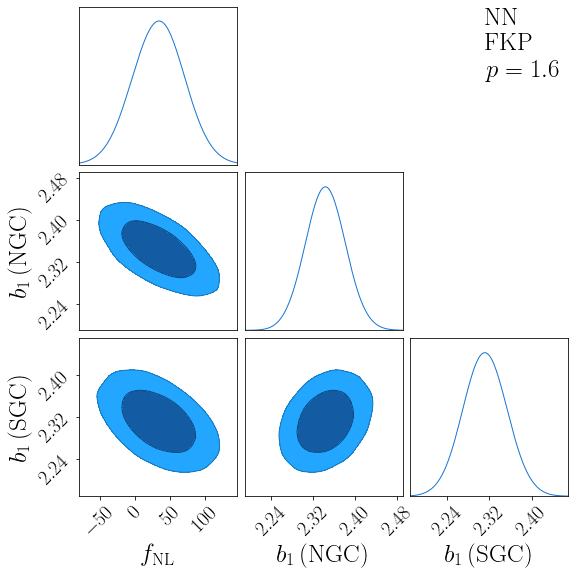

In [28]:
chain = np.load(output_NN_weights + "joint/fkp/1.6/chain.npy")
plot_corner_marco(chain, "joint", save = "./figures/corner_joint_fkp_16_NN.pdf",
                 annotate="${\\rm NN}$ \n ${\\rm FKP}$ \n $p=1.6$", xy=(75, 420),
                 limits=[(-80,145), (2.19, 2.49), (2.17, 2.47)])

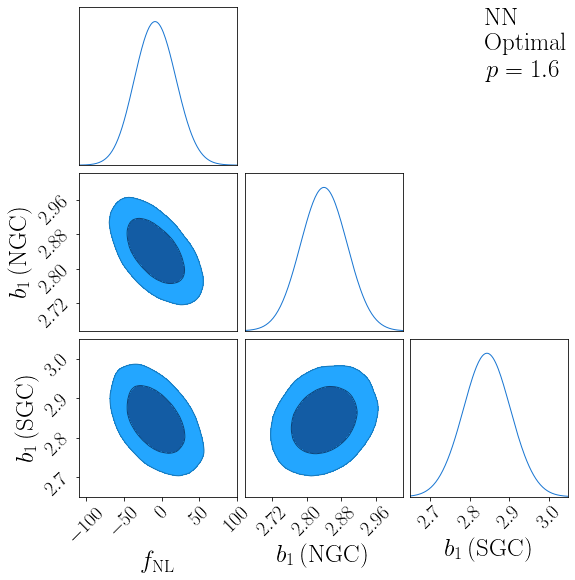

In [29]:
chain = np.load(output_NN_weights + "joint/1.6/chain.npy")
plot_corner_marco(chain, "joint", save = "./figures/corner_joint_16_NN.pdf",
                 annotate="${\\rm NN}$ \n ${\\rm Optimal}$ \n $p=1.6$", xy=(75, 420),
                 limits=[(-110,100), None, None])

# $f_{\rm NL} \, b_{\phi}$

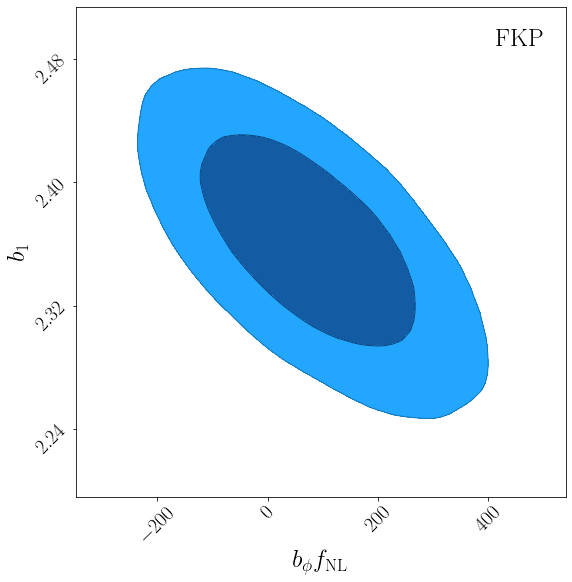

In [34]:
chain1 = np.load("fits/output-bphi_fnl/" + "SGC/fkp/chain.npy")

bphi_fnl = chain1[:,0,:].flatten() * 2 * 1.686
b1 = chain1[:,1,:].flatten()

data1 = np.vstack([bphi_fnl, b1]).transpose()
labels=[r"$b_\phi f_{\rm NL}$",
        r"$b_1$"]

c = ChainConsumer()
c.add_chain(data1, parameters=labels, name="FKP")
c.configure(kde=[2.1, 2.1], usetex=True, diagonal_tick_labels=True, shade=[True], bar_shade=[False], summary = False, 
            plot_hists=False, tick_font_size=20, label_font_size=25)
fig = c.plotter.plot(figsize="column")

plt.annotate('${\\rm FKP}$', xy=(420,450), xycoords='axes pixels', fontsize=25)

fig.set_size_inches(3 + fig.get_size_inches())

plt.savefig("./figures/bphi_fnl_SGC_fkp_linear.pdf", bbox_inches='tight')

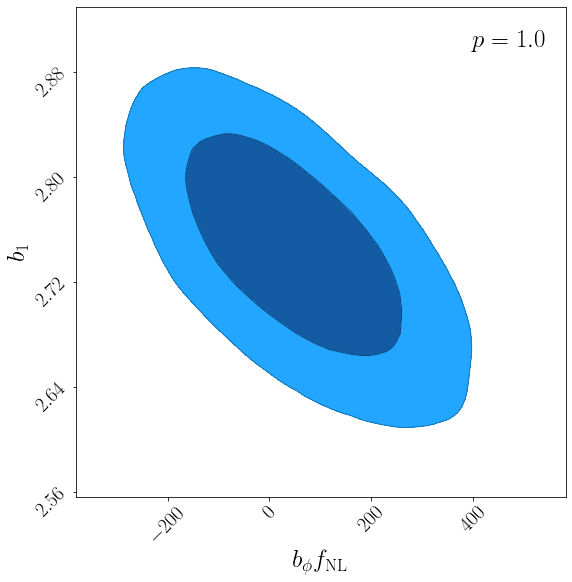

In [35]:
chain1 = np.load("fits/output-bphi_fnl/" + "SGC/1.0/chain.npy")

bphi_fnl = chain1[:,0,:].flatten() * 2 * 1.686
b1 = chain1[:,1,:].flatten()

data1 = np.vstack([bphi_fnl, b1]).transpose()
labels=[r"$b_\phi f_{\rm NL}$",
        r"$b_1$"]

c = ChainConsumer()
c.add_chain(data1, parameters=labels, name="FKP")
c.configure(kde=[2.1, 2.1], usetex=True, diagonal_tick_labels=True, shade=[True], bar_shade=[False], summary = False, 
            plot_hists=False, tick_font_size=20, label_font_size=25)
fig = c.plotter.plot(figsize="column")

plt.annotate('$p=1.0$', xy=(395,450), xycoords='axes pixels', fontsize=25)

fig.set_size_inches(3 + fig.get_size_inches())

plt.savefig("./figures/bphi_fnl_SGC_10_linear.pdf", bbox_inches='tight')

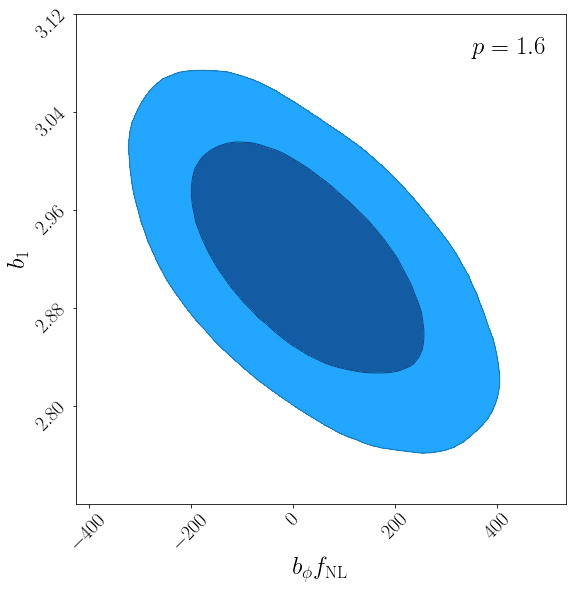

In [36]:
chain1 = np.load("fits/output-bphi_fnl/" + "SGC/1.6/chain.npy")

bphi_fnl = chain1[:,0,:].flatten() * 2 * 1.686
b1 = chain1[:,1,:].flatten()

data1 = np.vstack([bphi_fnl, b1]).transpose()
labels=[r"$b_\phi f_{\rm NL}$",
        r"$b_1$"]

extents = {r"$b_1$": (2.72,3.12)}

c = ChainConsumer()
c.add_chain(data1, parameters=labels, name="FKP")
c.configure(kde=[2.1, 2.1], usetex=True, diagonal_tick_labels=True, shade=[True], bar_shade=[False], summary = False, 
            plot_hists=False, tick_font_size=20, label_font_size=25)
fig = c.plotter.plot(figsize="column", extents=extents)

plt.annotate('$p=1.6$', xy=(395,450), xycoords='axes pixels', fontsize=25)

fig.set_size_inches(3 + fig.get_size_inches())

plt.savefig("./figures/bphi_fnl_SGC_16_linear.pdf", bbox_inches='tight')